Great! Let's walk through the **average reward update** step-by-step — this is a fundamental concept in many reinforcement learning algorithms and plays a key role in gradient-based bandits as a **baseline**.

---

## 🧠 Why Update Average Reward?

When using policy gradients (like gradient-based bandits), we often subtract a **baseline** (like average reward) to reduce variance in the updates.

If we just used:

$$
H(a) \leftarrow H(a) + \alpha \cdot r_t \cdot (\mathbb{1}_{[a = a_t]} - \pi(a))
$$

It would work, but might update **too much or too randomly**, especially in noisy environments.

So we use:

$$
H(a) \leftarrow H(a) + \alpha \cdot (r_t - \bar{r}_t) \cdot (\mathbb{1}_{[a = a_t]} - \pi(a))
$$

Here, $\bar{r}_t$ is the running **average of previous rewards**, which helps normalize the update.

---

## 📌 How Is the Average Reward Updated?

### ✅ Incremental Formula

You don’t need to store all past rewards to compute the average — you can update it incrementally like this:

$$
\bar{r}_{t+1} = \bar{r}_t + \frac{1}{t+1}(r_t - \bar{r}_t)
$$

This is like saying:

> "Take the old average, and shift it slightly toward the new reward."

---

### 🧮 Intuition Behind the Formula

Suppose you've seen rewards:
$r_1, r_2, ..., r_t$
Their average is:

$$
\bar{r}_t = \frac{1}{t} \sum_{i=1}^{t} r_i
$$

When you get a new reward $r_{t+1}$, the new average is:

$$
\bar{r}_{t+1} = \frac{1}{t+1} \sum_{i=1}^{t+1} r_i
= \frac{t}{t+1} \cdot \bar{r}_t + \frac{1}{t+1} \cdot r_{t+1}
$$

Which simplifies to the incremental update above!

---

### 🧪 Optional: Constant Step Size (Exponential Average)

Instead of using $\frac{1}{t+1}$, you can use a small constant $\beta$ (e.g., 0.01) to make it **adaptive** and faster for nonstationary environments:

$$
\bar{r}_{t+1} = \bar{r}_t + \beta (r_t - \bar{r}_t)
$$

This puts more weight on recent rewards — useful if the environment is **changing over time**.

---

## ✅ Summary

| Term                           | Formula                                                      | Meaning                                |
| ------------------------------ | ------------------------------------------------------------ | -------------------------------------- |
| **Incremental mean**           | $\bar{r}_{t+1} = \bar{r}_t + \frac{1}{t+1}(r_t - \bar{r}_t)$ | Tracks average of all rewards so far   |
| **Constant step-size average** | $\bar{r}_{t+1} = \bar{r}_t + \beta (r_t - \bar{r}_t)$        | Faster, better for nonstationary tasks |
| **Used in policy update as**   | $r_t - \bar{r}_t$                                            | Reduces variance in gradient           |

---


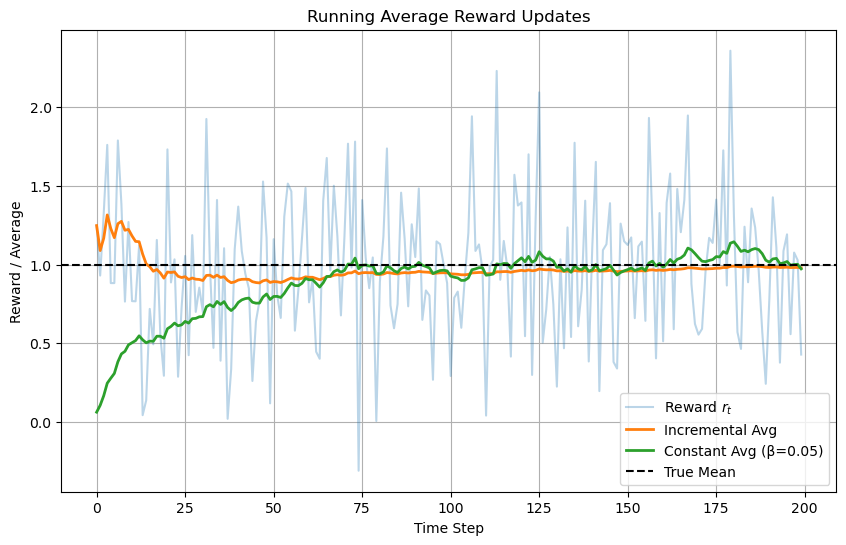

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate 200 rewards from a noisy reward source
np.random.seed(42)
true_mean = 1.0
rewards = np.random.normal(loc=true_mean, scale=0.5, size=200)

# Initialize averages
avg_incremental = []
avg_constant = []

# Initial values
avg_r_t_inc = 0
avg_r_t_const = 0
beta = 0.05  # constant step size

# Compute averages over time
for t, r in enumerate(rewards):
    # Incremental update
    avg_r_t_inc += (r - avg_r_t_inc) / (t + 1)
    avg_incremental.append(avg_r_t_inc)
    
    # Constant step size update
    avg_r_t_const += beta * (r - avg_r_t_const)
    avg_constant.append(avg_r_t_const)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(rewards, label='Reward $r_t$', alpha=0.3)
plt.plot(avg_incremental, label='Incremental Avg', linewidth=2)
plt.plot(avg_constant, label=f'Constant Avg (β={beta})', linewidth=2)
plt.axhline(true_mean, color='k', linestyle='--', label='True Mean')
plt.xlabel('Time Step')
plt.ylabel('Reward / Average')
plt.title('Running Average Reward Updates')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
bandits_obj = Bandits()
bandits_obj.learn_gradient()

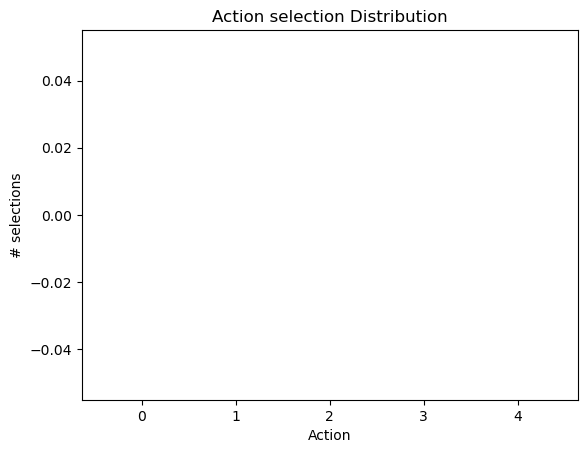

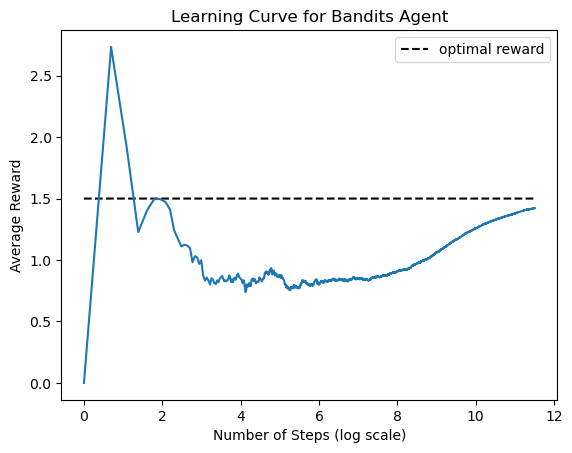

In [14]:
bandits_obj.plot_Bandits_learning()